### Naïve Bayes

In [2]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [2]:
# Conexión con la BD

# Conexión con la base

# Parámetros de conexión
param_dic = {
    "host"      : "localhost",
    "database"  : "cancerdb",
    "user"      : "manu",
    "password"  : "foo"
}

# Conexión e importanción de datos desde la base.
conn = psycopg2.connect(**param_dic)
df = pd.read_sql_query('SELECT * FROM esophageal_clean',con=conn)

In [3]:
df

,id_esophageal,region,age,sex,alcohol,tobacco,family_history,diff_swallowing,pain_swallowing,weight_loss,...,adj_organ,tnm_stage,surgery,t_hital_eso,t_thoracic_eso,chemotherapy,radiotherapy,hospital_stay,status_patient,khat
0,1,OROMIA,66,0,1,1,1,0,0,1,...,7,2,0,1,1,0,0,1,1,1
1,2,ADDIS ABABA,66,1,1,1,1,0,1,0,...,7,0,1,0,1,0,0,1,1,0
2,3,ADDIS ABABA,62,1,0,0,1,0,1,1,...,2,3,0,1,1,1,0,1,1,0
3,4,OROMIA,62,1,0,1,1,0,1,0,...,3,3,1,0,1,1,0,16,1,1
4,5,OROMIA,45,0,1,1,1,0,1,1,...,7,4,0,1,1,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,OROMIA,55,1,1,1,1,0,1,1,...,7,4,1,0,1,0,0,1,1,0
345,346,SNNPR,45,0,1,1,1,0,1,1,...,7,2,1,0,1,0,0,2,0,1
346,347,ADDIS ABABA,67,1,1,1,1,0,1,1,...,7,3,1,1,1,0,0,1,0,0
347,348,OROMIA,32,0,1,1,1,0,1,1,...,7,4,1,1,1,0,0,2,1,1


In [4]:
X = df.drop(columns=['status_patient','id_esophageal','region'])
y = df['status_patient']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = NaiveBayes.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
y_test - y_pred

229    0
130    1
244    0
89     1
331   -1
      ..
232    1
113    1
27     1
179    1
262    1
Name: status_patient, Length: 105, dtype: int64

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

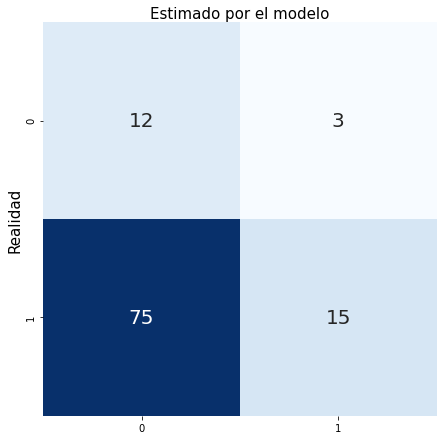

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [12]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.8333333333333334
Exactitud: 0.2571428571428571
Sensibilidad: 0.16666666666666666
Especificidad: 0.8


#### PCA

In [3]:
df2 = pd.read_csv("pca.csv", index_col=0)
df2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,status_patient
0,0.507395,-0.421142,0.387359,-0.278536,-0.256417,-0.142587,0.524002,-0.058740,0.692328,-0.513301,...,-0.154673,-0.372326,0.063447,0.203476,-0.029339,0.080054,0.230352,0.796531,-0.240772,1
1,-0.913338,0.469680,-0.897301,0.516064,0.090262,0.497239,0.621075,-0.086860,0.133382,0.429461,...,-0.458448,0.374120,-0.158740,-0.016830,-0.390028,-0.169044,-0.279533,0.069854,0.036733,1
2,0.941651,1.135893,-0.037524,-0.773436,-0.164629,0.358867,-0.304602,-0.485169,-0.876215,-0.409627,...,0.077079,0.381671,-0.126444,0.175365,0.071274,0.162689,0.224261,0.033812,0.427166,1
3,-0.485110,0.951573,-0.114926,0.300021,0.658008,-0.455769,-0.727300,-0.448736,-0.416970,-0.108712,...,-0.129338,0.247061,-0.112766,-0.044348,0.193446,-0.194722,-0.257878,0.049161,-0.170757,1
4,0.601519,-0.528808,0.330653,-0.170536,-0.526976,-0.289042,0.376571,0.071930,0.079052,0.315951,...,-0.333416,0.457902,0.236440,-0.114730,-0.240092,-0.016232,-0.234302,-0.079925,0.217646,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.715636,0.844186,0.210698,-0.527063,-0.621953,0.545056,0.055477,0.114063,0.486307,-0.182243,...,-0.338829,-0.401306,0.086131,0.039344,-0.104345,-0.041844,-0.050511,-0.155663,-0.145967,1
345,-0.761061,-0.283822,0.736366,-0.275418,-0.178385,-0.129462,0.489464,0.128567,0.204991,-0.060175,...,-0.086530,0.095372,0.038188,0.047724,0.024195,0.038740,-0.036529,0.005869,0.089886,0
346,-0.172933,0.545468,-0.276553,-0.631550,-0.470432,0.603202,0.171805,0.638355,0.791530,-0.395017,...,0.043759,-0.170708,-0.105080,0.269490,0.272448,0.049849,-0.268003,-0.048852,-0.063767,0
347,-0.069601,-0.202773,0.713319,-0.217294,-0.404543,-0.182210,0.095108,0.143212,0.436753,-0.236939,...,0.034064,-0.324481,0.039401,-0.055930,-0.026735,-0.044525,-0.031155,-0.045359,0.216065,1


In [4]:
X = df2.drop(columns=['status_patient'])
y = df2['status_patient']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [6]:
y_pred = NaiveBayes.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

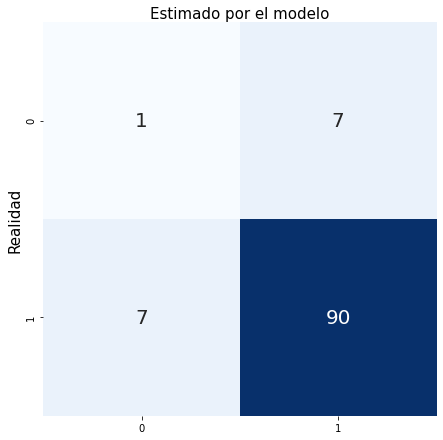

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [9]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9278350515463918
Exactitud: 0.8666666666666667
Sensibilidad: 0.9278350515463918
Especificidad: 0.125
